In [1]:
import pandas as pd
import seaborn as sns
import arcgis
from arcgis.gis import GIS
from IPython.display import Image

%matplotlib inline

In [2]:
gis = GIS(username='dsl030_UCSDOnline')

Enter password: ········


# DSC 106 Final Project
## Intro: 
- my canadian friend tells everyone that they have to try tim hortons when they come to canada. they spread it like the gospel and now we want to see if it's really worth the hype.
- we want to see if canadians really do prefer tim hortons over a traditional favorite: starbucks. 
- we decided to narrow down to the city of toronto due to limitations of the dataset, and to remove any regional biases in opinions

## Read in data

In [25]:
starbucks = pd.read_csv('data/starbucks.csv')[['business_id', 'latitude', 'longitude', 'stars']]
horton = pd.read_csv('data/horton.csv')[['business_id', 'latitude', 'longitude', 'stars']]
reviews = pd.read_csv('data/reviews.csv').drop(columns=['cool', 'funny'])
reviews['date'] = pd.to_datetime(reviews['date'])
users = pd.read_csv('data/users.csv')[['review_count', 'useful', 'user_id','yelping_since']]
users['yelping_since'] = pd.to_datetime(users['yelping_since'])
toronto = pd.read_csv('data/toronto.csv')
tor_reviews = pd.read_csv('data/tor_reviews.csv')
tor_reviews['date'] = pd.to_datetime(tor_reviews['date'])
tor_reviews['year'] = tor_reviews['date'].dt.year

In [3]:
starbucks_reviews = starbucks.merge(reviews, on='business_id', how='left').merge(users, on='user_id', how='left')
starbucks_reviews['year'] = starbucks_reviews.date.dt.year
horton_reviews = horton.merge(reviews, on='business_id', how='left').merge(users, on='user_id', how='left')
horton_reviews['year'] = horton_reviews.date.dt.year

## 1. overall rating (two numbers)

In [60]:
starbucks.stars.mean()

3.365625

In [6]:
horton.stars.mean()

2.725

## 2. out of all reviews, how many were useful? (pie)

In [97]:
reviews_users = reviews.merge(users, on='user_id', how='left')

False    1605
True     1179
dtype: int64

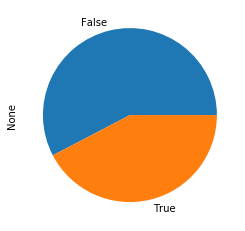

In [102]:
reviews_users_prop = ((reviews_users.useful_y > 200) & (reviews_users.review_count > 100)).value_counts()
display(reviews_users_prop)
reviews_users_prop.plot.pie();

False    1003
True      749
dtype: int64

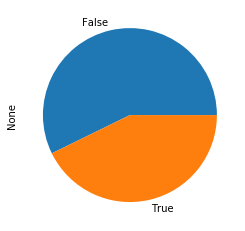

In [103]:
starbucks_reviews_prop = ((starbucks_reviews.useful_y > 200) & (starbucks_reviews.review_count > 100)).value_counts()
display(starbucks_reviews_prop)
starbucks_reviews_prop.plot.pie();

False    602
True     430
dtype: int64

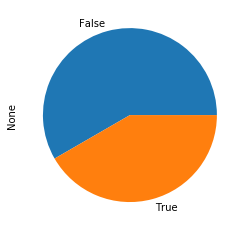

In [105]:
horton_reviews_prop = ((horton_reviews.useful_y > 200) & (horton_reviews.review_count > 100)).value_counts()
display(horton_reviews_prop)
horton_reviews_prop.plot.pie();

## 3. overall rating within useful reviews (two numbers?)

Explore "reliable user"

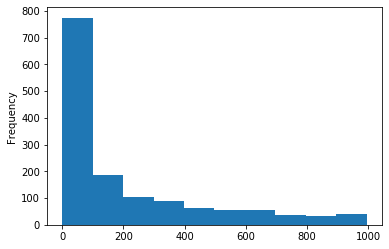

In [74]:
starbucks_reviews[starbucks_reviews.useful_y < 1000].useful_y.plot.hist();

In [89]:
starbucks_reviews[(starbucks_reviews.useful_y > 200) & (starbucks_reviews.review_count > 100)].stars_y.mean()

3.4899866488651536

In [90]:
horton_reviews[(horton_reviews.useful_y > 200) & (horton_reviews.review_count > 100)].stars_y.mean()

3.1372093023255814

In [93]:
starbucks_reviews[(starbucks_reviews.useful_y > 200) & (starbucks_reviews.review_count > 100)].shape[0] / len(starbucks_reviews)

0.4275114155251142

In [94]:
horton_reviews[(horton_reviews.useful_y > 200) & (horton_reviews.review_count > 100)].shape[0] / len(horton_reviews)

0.4166666666666667

## 4. Gain in popularity? 
### line: rating vs date

year
2008    4.000000
2009    2.900000
2010    3.342857
2011    3.301282
2012    3.517986
2013    3.309524
2014    3.419753
2015    3.489796
2016    3.421687
2017    3.463768
2018    3.453125
2019    3.192857
Name: stars_y, dtype: float64

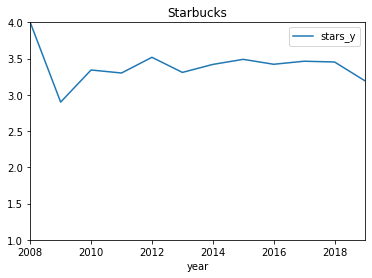

In [4]:
display(starbucks_reviews.groupby('year')['stars_y'].mean())
starbucks_reviews.groupby('year')['stars_y'].mean().reset_index().plot(x='year', y='stars_y', ylim=(1, 4), title='Starbucks');

year
2008    3.466667
2009    2.769231
2010    3.172414
2011    3.289474
2012    2.978723
2013    2.880952
2014    3.041667
2015    2.576923
2016    3.000000
2017    2.717557
2018    2.482014
2019    2.530488
Name: stars_y, dtype: float64

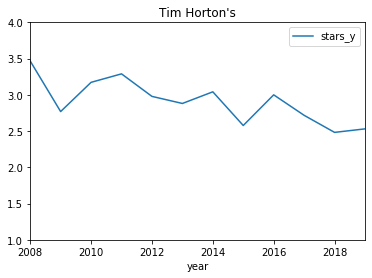

In [5]:
display(horton_reviews.groupby('year')['stars_y'].mean())
horton_reviews.groupby('year')['stars_y'].mean().reset_index().plot(x='year', y='stars_y', ylim=(1, 4), title='Tim Horton\'s');

year
2007    4.000000
2008    3.757857
2009    3.668887
2010    3.539327
2011    3.479602
2012    3.473612
2013    3.489450
2014    3.552508
2015    3.595154
2016    3.608232
2017    3.625241
2018    3.656433
2019    3.674407
Name: stars, dtype: float64

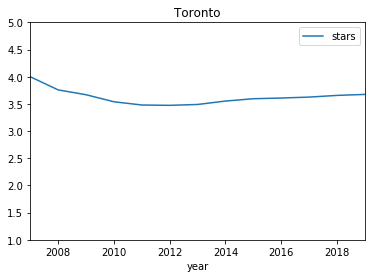

In [6]:
display(tor_reviews.groupby('year')['stars'].mean())
tor_reviews.groupby('year')['stars'].mean().reset_index().plot(x='year', y='stars', ylim=(1,5), title='Toronto');

### line: num reviews vs date

year
2008      4
2009     20
2010     70
2011    156
2012    139
2013    168
2014    162
2015    245
2016    249
2017    207
2018    192
2019    140
Name: stars_y, dtype: int64

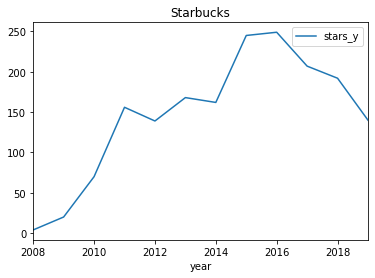

In [9]:
display(starbucks_reviews.groupby('year')['stars_y'].count())
starbucks_reviews.groupby('year')['stars_y'].count().reset_index().plot(x='year', y='stars_y', title='Starbucks');

year
2008     15
2009     13
2010     29
2011     38
2012     47
2013     84
2014     96
2015    130
2016    146
2017    131
2018    139
2019    164
Name: stars_y, dtype: int64

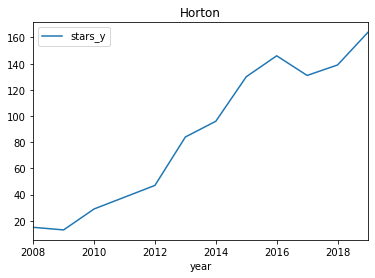

In [10]:
display(horton_reviews.groupby('year')['stars_y'].count())
horton_reviews.groupby('year')['stars_y'].count().reset_index().plot(x='year', y='stars_y', title='Horton');

year
2007        2
2008     3659
2009    10057
2010    18664
2011    28753
2012    34163
2013    44172
2014    57744
2015    77185
2016    85474
2017    88665
2018    84950
2019    67096
Name: stars, dtype: int64

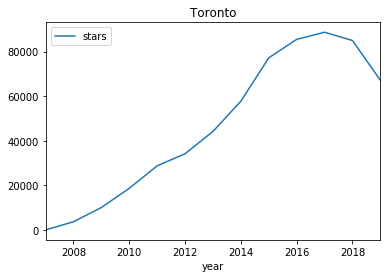

In [7]:
display(tor_reviews.groupby('year')['stars'].count())
tor_reviews.groupby('year')['stars'].count().reset_index().plot(x='year', y='stars', title='Toronto');

In [28]:
tor_merge = toronto[['name', 'business_id']].merge(tor_reviews, on='business_id')

In [53]:
tor_counts = tor_merge.groupby('name')['stars'].count()
above_800 = tor_counts[tor_counts > 800].index

year
2008      6.333333
2009     19.230769
2010     40.214286
2011     59.666667
2012     69.480000
2013     94.346154
2014    126.107143
2015    179.096774
2016    191.156250
2017    171.093750
2018    165.875000
2019    123.968750
Name: stars, dtype: float64

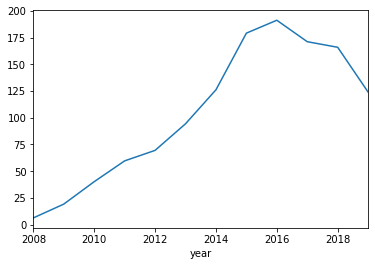

In [55]:
display(tor_merge[tor_merge.name.isin(above_800)].groupby(['name', 'year'])['stars'].count().reset_index().groupby('year')['stars'].mean())
tor_merge[tor_merge.name.isin(above_800)].groupby(['name', 'year'])['stars'].count().reset_index().groupby('year')['stars'].mean().plot();

## 5. geodata

In [13]:
starbucks.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,17-66 Wellington Street W,"{'RestaurantsPriceRange2': '2', 'WiFi': ""'free...",CSaB0_tKunqfcOqbw5FdAw,"Food, Coffee & Tea",Toronto,"{'Monday': '5:30-19:0', 'Tuesday': '5:30-19:0'...",1,43.647923,-79.381353,Starbucks,M5J 2W4,8,4.0,ON
1,139 Yorkville Ave,"{'RestaurantsTakeOut': 'True', 'GoodForKids': ...",X6Cgn59q3i3vK-lqzVY6gQ,"Cafes, Restaurants, Food, Coffee & Tea",Toronto,NaN,1,43.745437,-79.406571,Starbucks,M5R 1C4,3,3.0,ON
2,"1 First Canadian Place, 77 Adelaide Street W","{'WiFi': ""'free'"", 'BikeParking': 'True', 'Out...",PNzGMlH0SnvIMxIESVNLgw,"Food, Coffee & Tea",Toronto,NaN,1,43.648420,-79.381900,Starbucks,M5X 1C1,3,4.0,ON
3,1606-25 The West Mall,"{'NoiseLevel': ""u'loud'"", 'Caters': 'False', '...",jVJcR4y8q7FuwlK0cYVuyw,"Restaurants, Food, Cafes, Coffee & Tea",Toronto,"{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",1,43.612899,-79.555735,Starbucks,M9C 1B8,15,3.0,ON
4,205 Humber College Boulevard,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...",POuD26KrQ_ssxKuSFfXY0A,"Coffee & Tea, Food, Bakeries",Toronto,"{'Monday': '7:30-17:0', 'Tuesday': '7:30-17:0'...",1,43.729443,-79.607311,Starbucks,M9W 5L7,6,2.5,ON


In [30]:
map1 = gis.map('Toronto', zoomlevel=10)

tor = gis.content.get('5fa0e4d94e3147b1b957b0d84641c7a1').layers[0]
tor_sdf = pd.DataFrame.spatial.from_layer(tor)[['SHAPE']]
tor_sdf['loc'] = ['tor'] * len(tor_sdf)
tor_sdf.spatial.plot(map1, cmap='Pastel1', cstep=3, line_width=0, alpha=0.5)

# starbucks_sdf = pd.DataFrame.spatial.from_xy(starbucks, 'longitude', 'latitude')
# starbucks_sdf.spatial.plot(map1, cmap='Set1', cstep=2, line_width=0.3, alpha=0.9, marker_size=5)

horton_sdf = pd.DataFrame.spatial.from_xy(horton, 'longitude', 'latitude')
horton_sdf.spatial.plot(map1, cmap='Set1', cstep=0, line_width=0.3, alpha=0.7, marker_size=5)

True

In [31]:
map1

MapView(layout=Layout(height='400px', width='100%'), zoom=10.0)

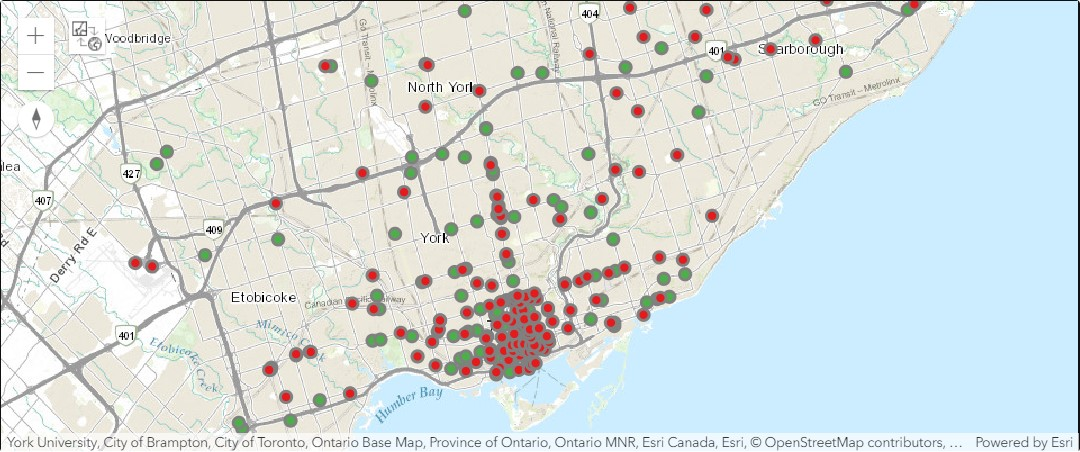

In [43]:
Image('data/map.jpg')

## Wordclouds

In [ ]:
# run if downloading for first time
# import nltk
# nltk.download('stopwords')

In [127]:
from nltk.corpus import stopwords
import re
import numpy as np

stop = stopwords.words('english')

In [146]:
rev_text = reviews.text.apply(lambda x: ' '.join([item for item in x.lower().split() if item not in stop]))
star_text = starbucks_reviews.text.apply(lambda x: ' '.join([item for item in x.lower().split() if item not in stop]))
hort_text = horton_reviews.text.apply(lambda x: ' '.join([item for item in x.lower().split() if item not in stop]))

In [152]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf.fit(star_text)
arr1 = tfidf.transform(star_text).toarray()
star_vals = pd.DataFrame(arr1, columns=tfidf.get_feature_names(), index=star_text.index).idxmax(axis=1)

tfidf = TfidfVectorizer()
tfidf.fit(hort_text)
arr2 = tfidf.transform(hort_text).toarray()
hort_vals = pd.DataFrame(arr2, columns=tfidf.get_feature_names(), index=hort_text.index).idxmax(axis=1)

In [155]:
star_vals.value_counts().head(30)

drink        8
store        6
mall         6
milk         6
water        5
thru         5
usually      5
parking      5
drive        5
ve           5
order        5
sit          5
grab         4
they         4
large        4
frap         4
wait         4
toronto      4
best         4
cafe         4
shop         4
market       4
caramel      4
tea          4
customer     3
floor        3
chocolate    3
morning      3
extra        3
fave         3
dtype: int64

In [156]:
hort_vals.value_counts().head(30)

double       11
coffee        7
tims          7
always        7
doughnuts     7
location      6
line          6
donuts        6
ice           6
tea           5
bagel         5
usually       5
soup          5
breakfast     4
order         4
capp          4
half          4
timbits       4
love          4
doughnut      4
asked         4
sugar         3
wrap          3
timmy         3
cheese        3
th            3
station       3
available     3
there         3
timmie        3
dtype: int64